### Importing relevant libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Reading CSV

In [25]:
#Reading the data from csv
sales_data=pd.read_csv("Assignment Dataset - Brandintelle - dataset.csv")
sales_data

,Sr No,DATE,Sales,TV_Spends,OOH_Spends,Print_Spends,FB_Impressions,Paid_Search_Clicks,Search_Spends,competitor_sales_B,FB_Spends,events
0,1,2015-11-23,2754371.667,167687.6,0,95463.66667,7.290385e+07,0.00000,0,8125009,228213.98740,na
1,2,2015-11-30,2584276.667,214600.9,0,0.00000,1.658110e+07,29511.71546,31000,7901549,34258.57351,na
2,3,2015-12-07,2547386.667,0.0,248022,3404.00000,4.995477e+07,36132.35896,28400,8300197,127691.26130,event0
3,4,2015-12-14,2875220.000,625877.3,0,132600.00000,3.164930e+07,36804.21096,31900,8122883,84014.72031,na
4,5,2015-12-21,2215953.333,0.0,520005,0.00000,8.802269e+06,28401.74407,27100,7105985,20687.47816,na
...,...,...,...,...,...,...,...,...,...,...,...,...
203,204,2019-10-14,2456240.000,0.0,60433,153723.66670,0.000000e+00,152840.32340,112100,7612762,0.00000,na
204,205,2019-10-21,2182825.000,154917.6,0,0.00000,5.688196e+07,103680.04780,103700,6701667,133624.57550,na
205,206,2019-10-28,2377706.667,21982.5,14094,17476.00000,0.000000e+00,138387.70410,114700,7688920,0.00000,na
206,207,2019-11-04,2732825.000,22453.0,0,24051.33333,0.000000e+00,151707.99050,134100,8815710,0.00000,na


In [26]:
pd.to_datetime(sales_data['DATE']).dt.year.unique()

array([2015, 2016, 2017, 2018, 2019], dtype=int32)

Data contains weekly spends on different marketing channels of an XYZ company for a period from 2015 to 2019

In [27]:
#Dropping the Sr No columns as it contains no info rather just an index
sales_data=sales_data.drop('Sr No',axis=1)

### EDA

In [28]:
#Printing the shape of dataset
sales_data.shape

(208, 11)

In [29]:
#Priting basic info of dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                208 non-null    object 
 1   Sales               208 non-null    float64
 2   TV_Spends           208 non-null    float64
 3   OOH_Spends          208 non-null    int64  
 4   Print_Spends        208 non-null    float64
 5   FB_Impressions      208 non-null    float64
 6   Paid_Search_Clicks  208 non-null    float64
 7   Search_Spends       208 non-null    int64  
 8   competitor_sales_B  208 non-null    int64  
 9   FB_Spends           208 non-null    float64
 10  events              208 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 18.0+ KB


We have 11 columns of which 9 are numerical and 2 are non-numerical. One of them being a datetime column and other being a string object describing the event type.

In [30]:
#Statistical properties of dataset
sales_data.describe().apply(lambda x: x.apply('{0:.2f}'.format))

,Sales,TV_Spends,OOH_Spends,Print_Spends,FB_Impressions,Paid_Search_Clicks,Search_Spends,competitor_sales_B,FB_Spends
count,208.00,208.00,208.00,208.00,208.00,208.00,208.00,208.00,208.00
mean,1822142.77,111327.68,81033.64,27964.74,24460244.99,50835.62,44366.35,5538024.90,64369.73
std,716228.61,214187.75,157483.92,48623.03,35097382.35,40842.28,35268.77,2077191.97,94810.91
min,672250.00,0.00,0.00,0.00,0.00,0.00,0.00,2240235.00,0.00
25%,1165211.25,0.00,0.00,0.00,0.00,18842.05,17650.00,3589581.25,0.00
50%,1874514.17,0.00,0.00,0.00,0.00,42795.76,36050.00,5538524.00,0.00
75%,2378407.08,138050.30,95359.00,35758.75,41212258.20,75710.53,64025.00,7311814.00,108690.37
max,3827520.00,1185349.30,938178.00,239417.33,178298272.90,156564.38,134100.00,9984742.00,462011.74


In [31]:
#Checking for null values
sales_data.isnull().sum()

DATE                  0
Sales                 0
TV_Spends             0
OOH_Spends            0
Print_Spends          0
FB_Impressions        0
Paid_Search_Clicks    0
Search_Spends         0
competitor_sales_B    0
FB_Spends             0
events                0
dtype: int64

No Null Values in any columns

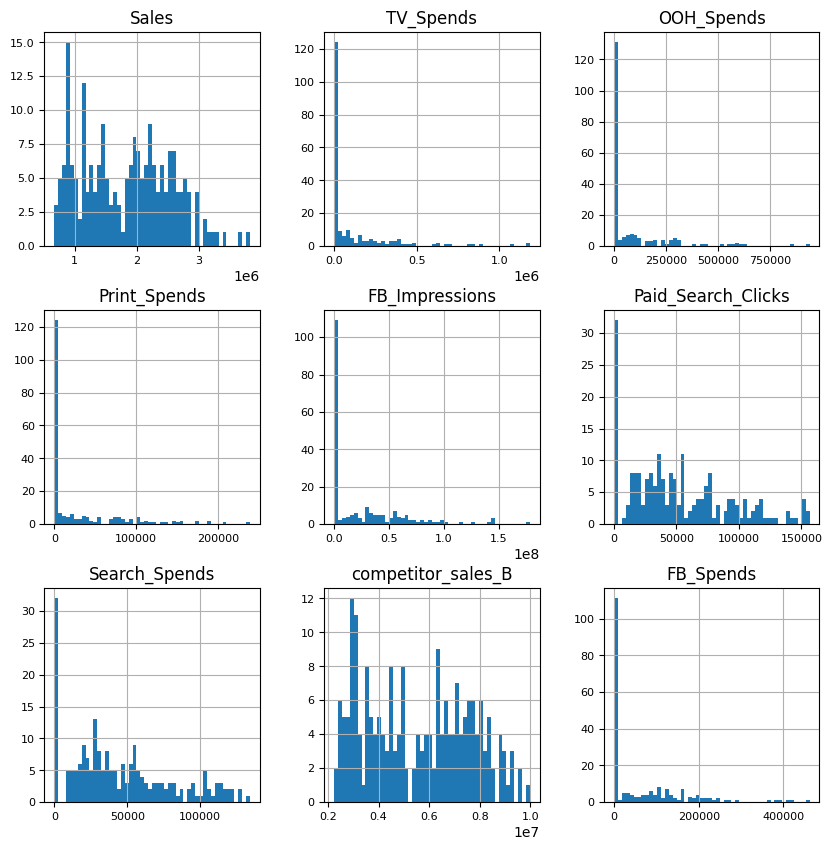

In [32]:
sales_data.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8);

In [33]:
#Checking the correlation of variables with Sales
df_num_corr = sales_data.corr(numeric_only=True)['Sales'][1:]
golden_features_list = df_num_corr.sort_values(ascending=False)
print("There is {} strongly correlated values with Sales:\n{}".format(len(golden_features_list), golden_features_list))

There is 8 strongly correlated values with Sales:
competitor_sales_B    0.916454
Search_Spends         0.442774
Paid_Search_Clicks    0.427513
TV_Spends             0.419869
FB_Spends             0.317594
FB_Impressions        0.315126
Print_Spends          0.230415
OOH_Spends            0.095279
Name: Sales, dtype: float64


We see that the competitor sales has highest correlation(>0.9) with the company's sales. Marketing channels that are most correlated with Sales are Search Spends, Paid Search Clicks and TV Spends(though the correlation is less than 0.5). Spends on Outdoor medium being least correlated.

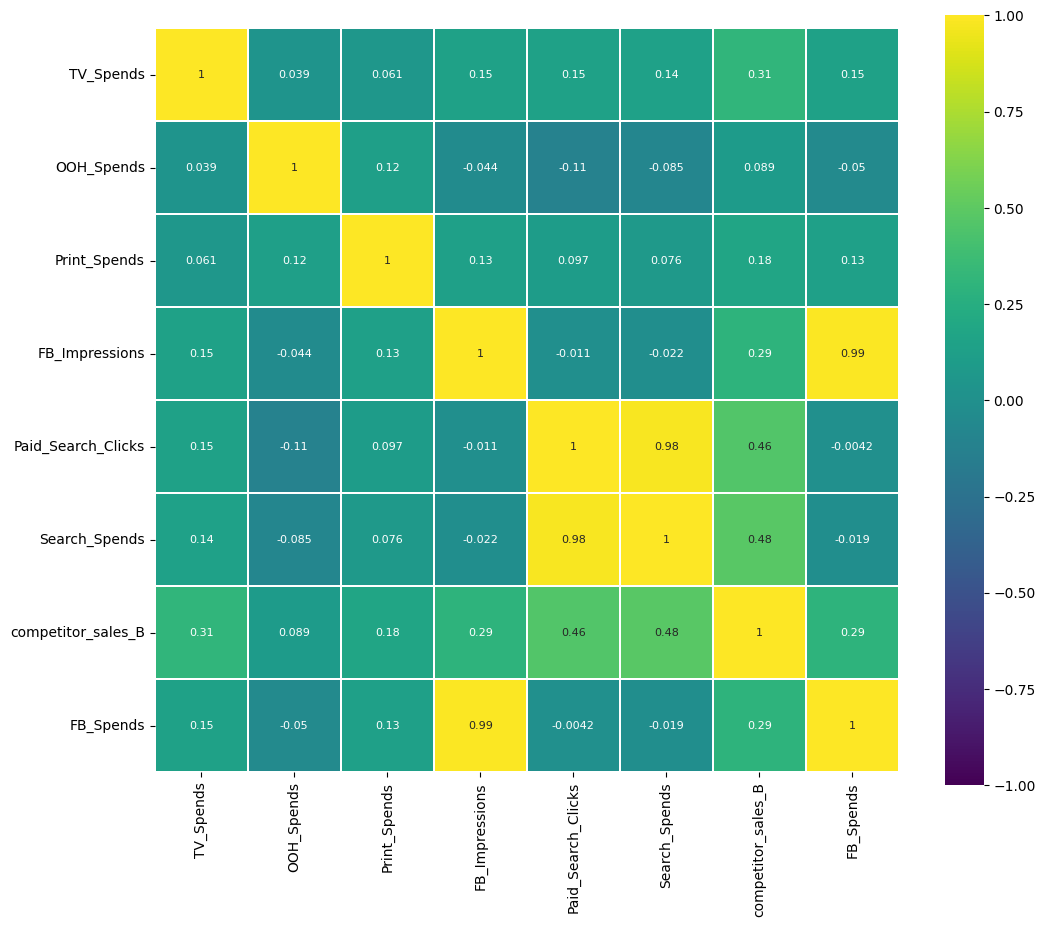

In [34]:
#Checking correlation among different variables
corr = sales_data.drop('Sales', axis=1).corr(numeric_only=True) # We already examined Sales correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr, cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

FB Impressions and FB Spends are strongly positively correlated.

/home/pranav/code/Python/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/pranav/code/Python/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/pranav/code/Python/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


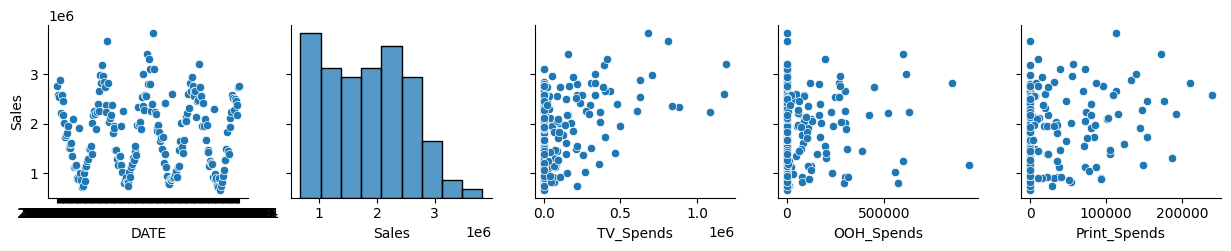

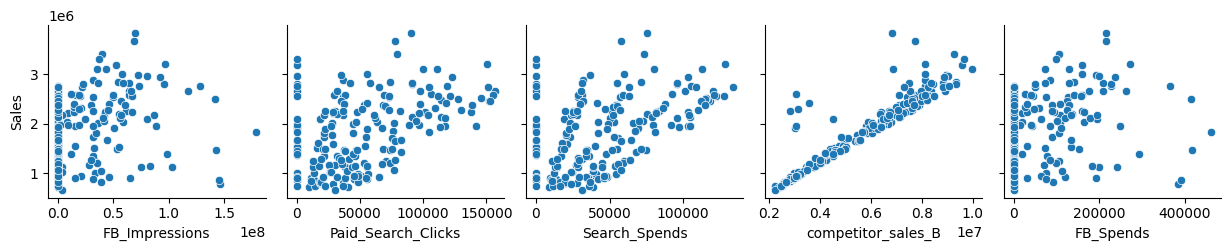

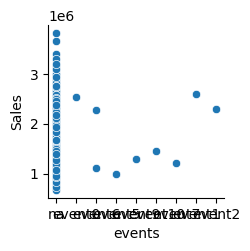

In [35]:
for i in range(0, len(sales_data.columns), 5):
    sns.pairplot(data=sales_data,
                x_vars=sales_data.columns[i:i+5],
                y_vars=['Sales'])

In [36]:
sales_data['events'].value_counts()

events
na         199
event6       2
event0       1
event5       1
event9       1
event10      1
event7       1
event1       1
event2       1
Name: count, dtype: int64

8 different events were conducted during only 9 out of 208 weeks

In [37]:
#Creating a flag for if event was conducted
sales_data['Event_Flag'] = sales_data['events'].apply(lambda x: 'No-Event' if x == 'na' else 'Event')
sales_data['Event_Flag'].value_counts()

Event_Flag
No-Event    199
Event         9
Name: count, dtype: int64

In [39]:
sales_data.groupby(['Event_Flag']).mean(numeric_only=True).apply(lambda x: x.apply('{0:.2f}'.format))

,Sales,TV_Spends,OOH_Spends,Print_Spends,FB_Impressions,Paid_Search_Clicks,Search_Spends,competitor_sales_B,FB_Spends
Event_Flag,,,,,,,,,
Event,1756940.00,40036.41,108202.22,17929.37,11801150.71,41921.50,35811.11,4546410.33,28091.00
No-Event,1825091.64,114551.91,79804.91,28418.60,25032766.85,51238.77,44753.27,5582871.79,66010.48


In [42]:
#Boxplot showing how event impacts the weekly sales
import plotly.express as px
import plotly.graph_objects as go
event_sales= pd.DataFrame({'Event_Flag': sales_data['Event_Flag'],'Sales': sales_data['Sales']})
fig = px.violin(event_sales, y="Sales", x="Event_Flag", color="Event_Flag", box=True, points="all",
          hover_data=event_sales.columns,title='Effect of Event on Sales', color_discrete_map={'No-Event':"#000000",'Event':'#E50914'})
fig.show()

Not much distinction basis events. Infact the mean sales seems to be higher for weeks in which no event was conducted.
However, this could be because of too few data points to justify the impact of events.

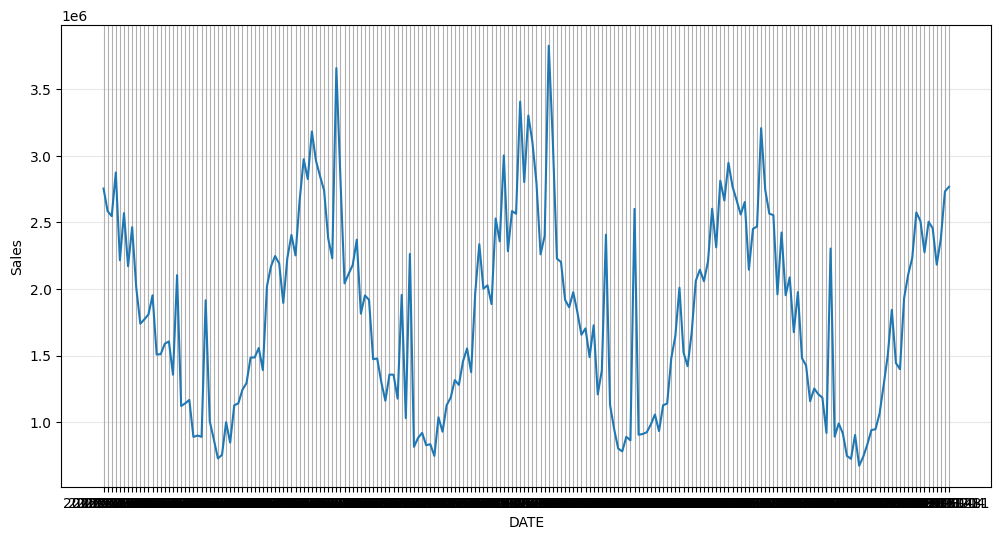

In [43]:
plt.figure(figsize=(12,6))
sns.lineplot(x=sales_data['DATE'], y=sales_data['Sales'])
plt.grid(axis='x')
plt.grid(axis='y', alpha=0.3)
plt.show()

Cyclical trends can be observed looking at the distribution.

In [44]:
#Creating Months and Year Column from Date
sales_data['Year'] = pd.to_datetime(sales_data['DATE']).dt.year
sales_data['Month'] = pd.to_datetime(sales_data['DATE']).dt.month
sales_data['Year-Month']=pd.to_datetime(sales_data['DATE']).dt.strftime('%Y-%m')

In [46]:
sales_data.groupby(['Year']).mean(numeric_only=True).apply(lambda x: x.apply('{0:.2f}'.format))

,Sales,TV_Spends,OOH_Spends,Print_Spends,FB_Impressions,Paid_Search_Clicks,Search_Spends,competitor_sales_B,FB_Spends,Month
Year,,,,,,,,,,
2015,2591188.33,209559.27,128004.50,78480.83,38298895.59,28151.97,24450.00,7775476.67,109162.70,11.67
2016,1796652.82,114608.42,108271.77,27529.84,24732003.63,22716.39,20338.46,5478792.42,65059.06,6.48
2017,1874726.09,138712.79,133388.35,32546.75,26879812.44,42892.35,38109.62,5611008.04,69122.56,6.44
2018,1847854.18,118167.70,54398.11,26193.96,22003139.21,66613.76,57271.70,5557873.68,57450.87,6.53
2019,1658013.15,54738.04,14167.64,18522.64,22399039.36,76949.19,66817.78,5200430.91,60257.51,5.82


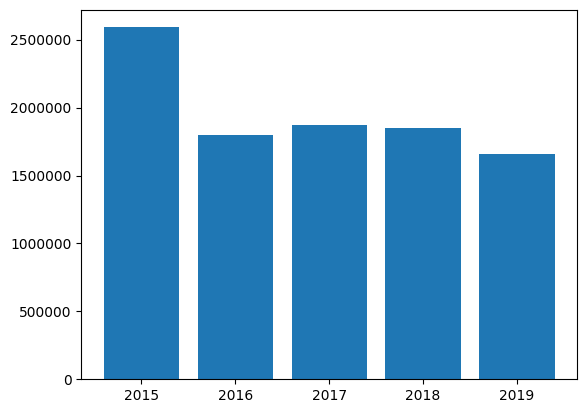

In [47]:
#Month Wise distribution of Mean Sales
year=range(2015,2020)
year_sales=sales_data[['Year','Sales']].groupby(['Year']).mean()
plt.bar(year,year_sales['Sales'])
plt.ticklabel_format(style='plain')
plt.show()

Mean sales for year 2015 are highest as compared to other years. 

In [49]:
sales_data.groupby(['Month']).mean(numeric_only=True).apply(lambda x: x.apply('{0:.2f}'.format))

,Sales,TV_Spends,OOH_Spends,Print_Spends,FB_Impressions,Paid_Search_Clicks,Search_Spends,competitor_sales_B,FB_Spends,Year
Month,,,,,,,,,,
1,2263679.63,82654.46,80084.67,49924.44,35887120.01,74575.35,67316.67,6910134.56,91658.41,2017.50
2,1797924.02,77960.15,34350.12,20106.82,20425386.85,32377.89,27335.29,5724653.41,56775.78,2017.41
3,1442367.92,52486.46,36661.38,40988.94,12160523.10,46990.41,41406.25,4456946.06,28514.36,2017.50
4,1245123.06,29735.00,107770.67,6442.56,15846052.38,39339.98,33066.67,3389473.17,41170.16,2017.61
5,1106536.67,29377.63,64286.72,15256.52,17905945.60,15395.09,13894.44,2873024.39,46928.36,2017.39
6,868191.04,37655.95,40135.56,10246.94,7397171.13,29655.54,26493.75,2807216.19,17780.53,2017.50
7,1222073.77,34877.92,95307.37,24707.63,12711252.83,42660.17,37105.26,3901514.63,33383.48,2017.58
8,1671366.08,141332.14,77228.41,20304.41,28782001.66,33585.02,27094.12,5245950.88,76062.15,2017.41
9,2183885.49,107495.05,102412.53,40661.59,11727620.50,81661.26,67188.24,6856887.76,29158.09,2017.59


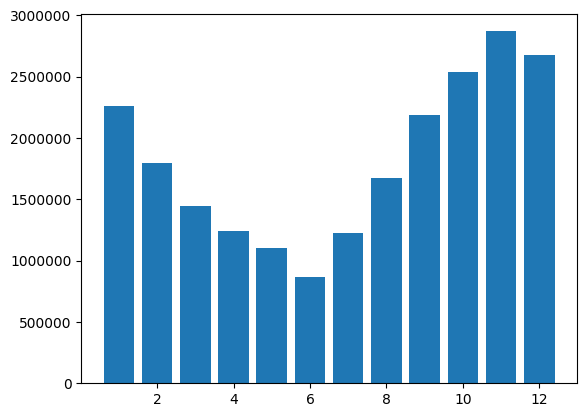

In [50]:
#Month Wise distribution of Mean Sales
month=range(1,13)
month_sales=sales_data[['Month','Sales']].groupby(['Month']).mean()
plt.bar(month,month_sales['Sales'])
plt.ticklabel_format(style='plain')
plt.show()

We see the mean sales are highest towards the end of year. Q4 and Q1 seems to perform well.

### Developing a Regression Model to understand the contribution of different marketing channels on Sales

In [51]:
X = sales_data.drop(['DATE','Sales','Year','Month','events','Event_Flag','Year-Month'],axis=1)
y = sales_data.Sales

In [52]:
X

,TV_Spends,OOH_Spends,Print_Spends,FB_Impressions,Paid_Search_Clicks,Search_Spends,competitor_sales_B,FB_Spends
0,167687.6,0,95463.66667,7.290385e+07,0.00000,0,8125009,228213.98740
1,214600.9,0,0.00000,1.658110e+07,29511.71546,31000,7901549,34258.57351
2,0.0,248022,3404.00000,4.995477e+07,36132.35896,28400,8300197,127691.26130
3,625877.3,0,132600.00000,3.164930e+07,36804.21096,31900,8122883,84014.72031
4,0.0,520005,0.00000,8.802269e+06,28401.74407,27100,7105985,20687.47816
...,...,...,...,...,...,...,...,...
203,0.0,60433,153723.66670,0.000000e+00,152840.32340,112100,7612762,0.00000
204,154917.6,0,0.00000,5.688196e+07,103680.04780,103700,6701667,133624.57550
205,21982.5,14094,17476.00000,0.000000e+00,138387.70410,114700,7688920,0.00000
206,22453.0,0,24051.33333,0.000000e+00,151707.99050,134100,8815710,0.00000


In [53]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [54]:
from sklearn import datasets, linear_model, metrics
# create linear regression object
reg = linear_model.LinearRegression()

In [55]:
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [56]:
# regression coefficients
print('Coefficients: ', reg.coef_)

Coefficients:  [ 0.51924452  0.00474753  0.73400357 -0.00800303 -1.25359629  1.61055123
  0.28572823  3.22811137]


The high positive coefficient of Facebook spends, Search spends and Print Spends shows that the sales increase the most by spending in these two marketing channels. 

The negative coeffecient of Facebook impression and Paid Search Click shows that sales have an inverse relationship with Sales.

In [57]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Variance score: 0.9330838974301033


In [58]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 683.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 680.6 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [59]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = sales_data

In [60]:
df['Sales']

0      2754371.667
1      2584276.667
2      2547386.667
3      2875220.000
4      2215953.333
          ...     
203    2456240.000
204    2182825.000
205    2377706.667
206    2732825.000
207    2767788.333
Name: Sales, Length: 208, dtype: float64

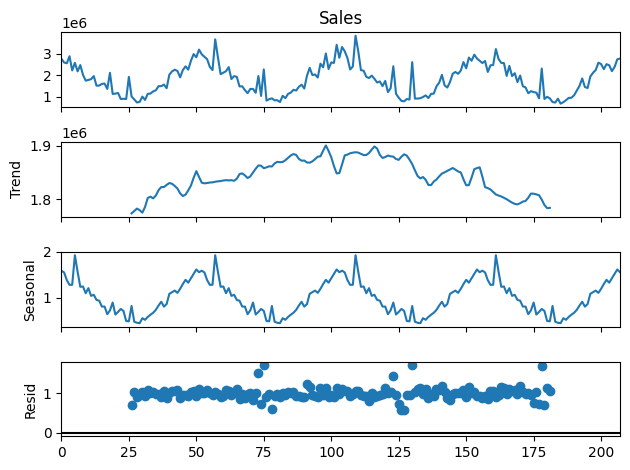

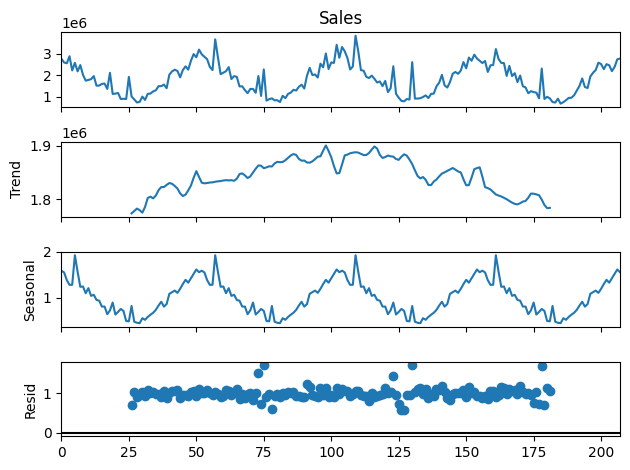

In [61]:
# ETS Decomposition
result = seasonal_decompose(df['Sales'],
                            model ='multiplicative',period = 52)

# ETS plot
result.plot()


In [62]:
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [63]:
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(df['Sales'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 52,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[52] intercept   : AIC=4510.479, Time=28.76 sec
 ARIMA(0,0,0)(0,1,0)[52] intercept   : AIC=4508.491, Time=0.23 sec
 ARIMA(1,0,0)(1,1,0)[52] intercept   : AIC=4508.910, Time=7.46 sec
 ARIMA(0,0,1)(0,1,1)[52] intercept   : AIC=4509.508, Time=5.48 sec
 ARIMA(0,0,0)(0,1,0)[52]             : AIC=4513.628, Time=0.19 sec
 ARIMA(0,0,0)(1,1,0)[52] intercept   : AIC=4509.686, Time=4.13 sec
 ARIMA(0,0,0)(0,1,1)[52] intercept   : AIC=4509.684, Time=3.56 sec
 ARIMA(0,0,0)(1,1,1)[52] intercept   : AIC=4511.685, Time=4.13 sec
 ARIMA(1,0,0)(0,1,0)[52] intercept   : AIC=4508.734, Time=0.47 sec
 ARIMA(0,0,1)(0,1,0)[52] intercept   : AIC=4508.919, Time=0.49 sec
 ARIMA(1,0,1)(0,1,0)[52] intercept   : AIC=4510.678, Time=0.99 sec

Best model:  ARIMA(0,0,0)(0,1,0)[52] intercept
Total fit time: 55.893 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  208
Model:             SARIMAX(0, 1, 0, 52)   Log Likelihood               -2252.246
Date:                  Wed, 28 Aug 2024   AIC                           4508.491
Time:                          22:01:18   BIC                           4514.591
Sample:                               0   HQIC                          4510.969
                                  - 208                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4461.1218   3.61e+04      0.124      0.902   -6.63e+04    7.52e+04
sigma2      2.031e+11   1.35e+10     15.084      0.000    1.77e+11     2.3e+11
===================================================================================
Ljung-Box (L1) (Q):                   1.62   Jarque-Bera (JB):                96.18
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                            -0.09
Prob(H) (two-sided):                  0.48   Kurtosis:                         6.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
# Split data into train /test sets
train = df.iloc[:len(df)-26]
test = df.iloc[len(df)-26:] # set one year(52 weeks) for testing
  


In [65]:
# Fit a SARIMAX(0,0 ,0 )x(0, 1, 0, 52) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['Sales'], 
                order = ( 0,0 ,0 ), 
                seasonal_order =( 0, 1, 0, 52))
  
result = model.fit()
result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03382D+01    |proj g|=  7.46957D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   7.470D-07   1.034D+01
  F =   10.338217225418427     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                    Sales   No. Observations:                  182
Model:             SARIMAX(0, 1, 0, 52)   Log Likelihood               -1881.556
Date:                  Wed, 28 Aug 2024   AIC                           3765.111
Time:                          22:01:18   BIC                           3767.979
Sample:                               0   HQIC                          3766.276
                                  - 182                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.463e+11   8.26e+09     17.713      0.000     1.3e+11    1.63e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):                43.83
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                             0.25
Prob(H) (two-sided):                  0.69   Kurtosis:                         5.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

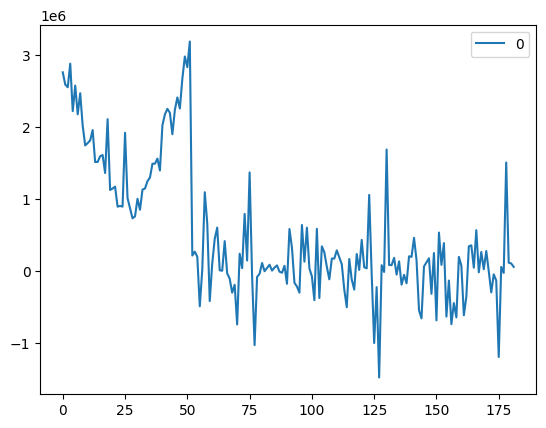

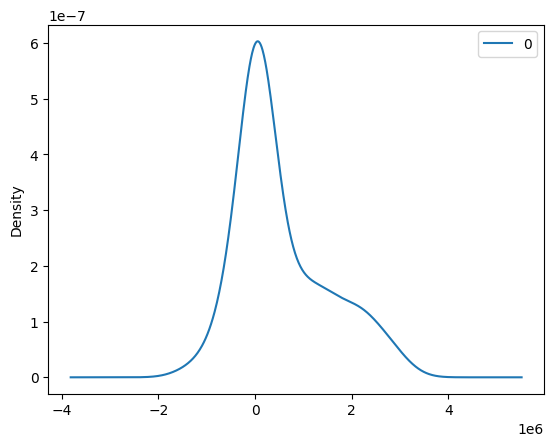

                  0
count  1.820000e+02
mean   5.315399e+05
std    9.431884e+05
min   -1.483305e+06
25%   -3.635667e+04
50%    1.701725e+05
75%    1.113002e+06
max    3.182900e+06


In [66]:
# line plot of residuals
residuals = pd.DataFrame(result.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

<Axes: >

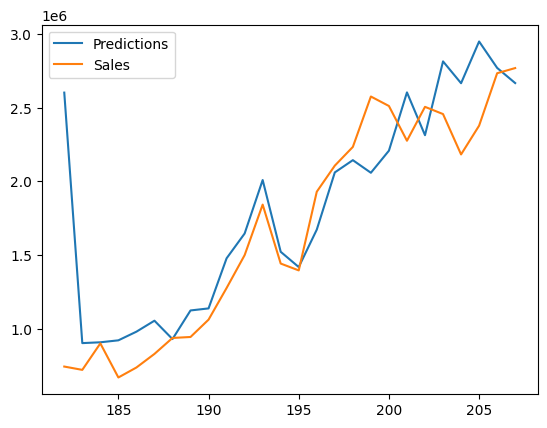

In [67]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = pd.DataFrame(result.predict(start, end,
                             typ = 'levels').rename("Predictions"))
predictions  = predictions
# plot predictions and actual values
predictions.plot(legend = True)
test['Sales'].plot(legend = True)

In [68]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse(test["Sales"], predictions)
  
# Calculate mean squared error
mean_squared_error(test["Sales"], predictions)

194533705125.85315

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08453D+01    |proj g|=  6.40553D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   6.406D-07   1.085D+01
  F =   10.845260034933224     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<Axes: >

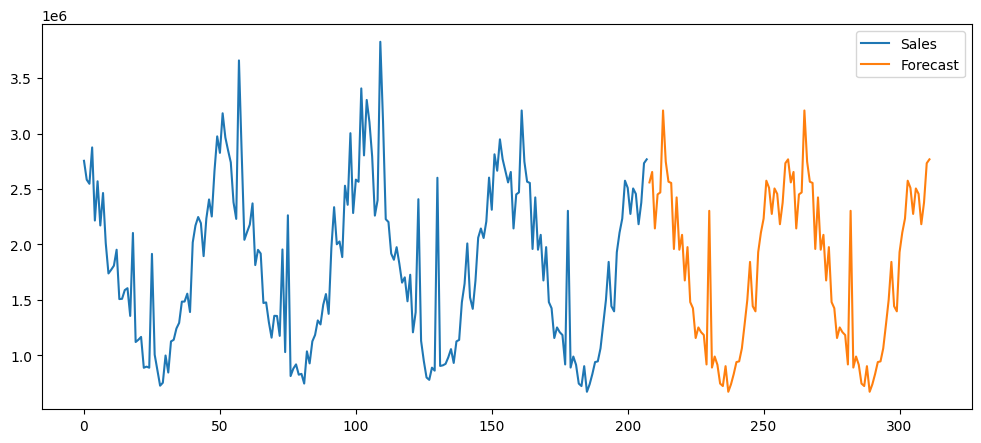

In [69]:
# Train the model on the full dataset
model = model = SARIMAX(df['Sales'], 
                        order = (0,0 ,0 ), 
                        seasonal_order =(0,1 ,0 , 52))
result = model.fit()
  
# Forecast for the next 1 years
forecast = result.predict(start = len(df), 
                          end = (len(df)-1) +(2*52), 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df['Sales'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)